<p align="center">
  <img src="./src/images/Icon_TensorFlow.png" alt="Icon TensorFlow" width="50" align="left"> 
</p>

# Deep Learning Regression Model for Predicting chances of applicant being admitted

---


- Author: [Stefanus Bernard Melkisedek](https://www.github.com/stefansphtr)
- Email: [stefanussipahutar@gmail.com](stefanussipahutar@gmail.com)
- Date: 2024-02-04

## Project Description

This project is a regression model that predicts the chances of an applicant being admitted to a university based on their scores in two exams. The dataset contains nine columns: 

1. Serial No. `(index)`
2. GRE Score `(int)`
3. TOEFL Score `(int)`
4. University Rating `(int)` 
5. SOP (Statement of Purpose) `(float)`
6. LOR (Letter of Recommendation) `(float)`
7. CGPA (Cumulative Grade Point Average) `(float)`
8. Research `(int)`
9. Chance of Admit `(float)`

The model is implemented using a neural network with two hidden layers. The model is trained on the training set and evaluated on the test set. The performance of the model is evaluated using the mean squared error (MSE) and the R-squared score.

## Prepare the libraries

In [1]:
# Importing libraries for data manipulation and analysis
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns # For data visualization

# Importing TensorFlow and Keras for creating and training the neural network model
import tensorflow as tf  # For machine learning and numerical computation
from tensorflow import keras  # High-level API to build and train models in TensorFlow
from keras.models import Sequential  # For linear stacking of layers
from keras.callbacks import EarlyStopping  # To stop training when a monitored metric has stopped improving
from keras.layers import Dense  # For fully connected layers

# Importing Scikit-learn libraries for data preprocessing and performance metrics
from sklearn.model_selection import train_test_split  # For splitting the data into train and test sets
from sklearn.preprocessing import StandardScaler  # For standardization of features
from sklearn.preprocessing import Normalizer  # For normalization of features
from sklearn.compose import ColumnTransformer  # For applying transformers to columns of an array or pandas DataFrame
from sklearn.metrics import r2_score  # For regression performance metrics

# Importing custom functions
import utils

## Data Wrangling

**Data Wrangling**: This is the process of **gathering, selecting, and transforming data** to answer an analytical question. **Also known** as **data munging**, it **involves cleaning and unifying messy and complex data sets** for easy access and analysis. This could include dealing with missing values, outliers, or inconsistent data.

### Gathering the dataset

Dataset Graduate Admission 2 is obtained from [Kaggle](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions) and stored in the `data` directory.

Read and store the dataset in a DataFrame.

In [2]:
df_admissions = pd.read_csv('./data/admissions_data.csv')
df_admissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Assessing the dataset

In [3]:
# Check the summary of the dataset and its columns
df_admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


> We can see that the dataset have 9 columns and 500 rows. The dataset are in good shape and there are no incorrect data types.

In [4]:
# Check the missing values in the table admissions
df_admissions.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

> There is no missing data in the dataset. It seems like the dataset is ready to use, but for the sake of this project, we will check properly for the duplicates, outliers, and the distribution of the data.

In [5]:
# Check the duplicates value in the dataframe admissions
total_duplicate_values = df_admissions.duplicated().sum()
print(f"Total duplicate values: {total_duplicate_values}")

Total duplicate values: 0


In [6]:
# Check the statistic of the dataframe admissions
df_admissions.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


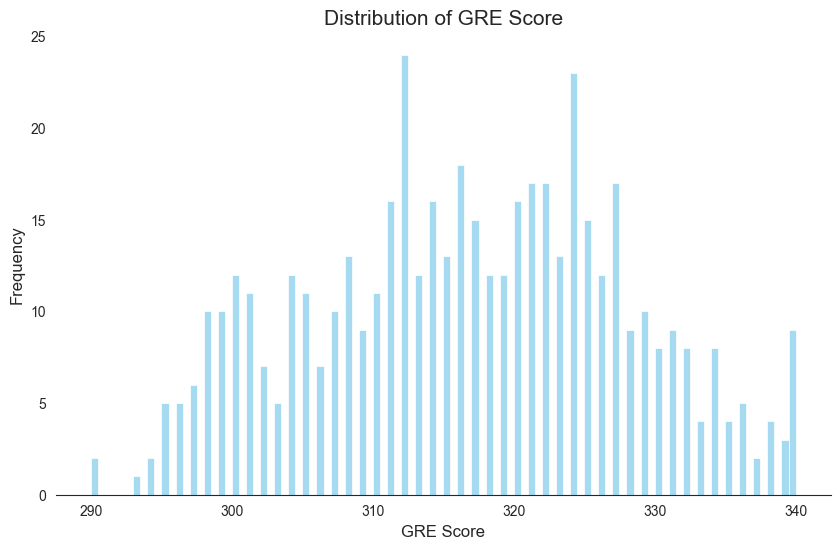

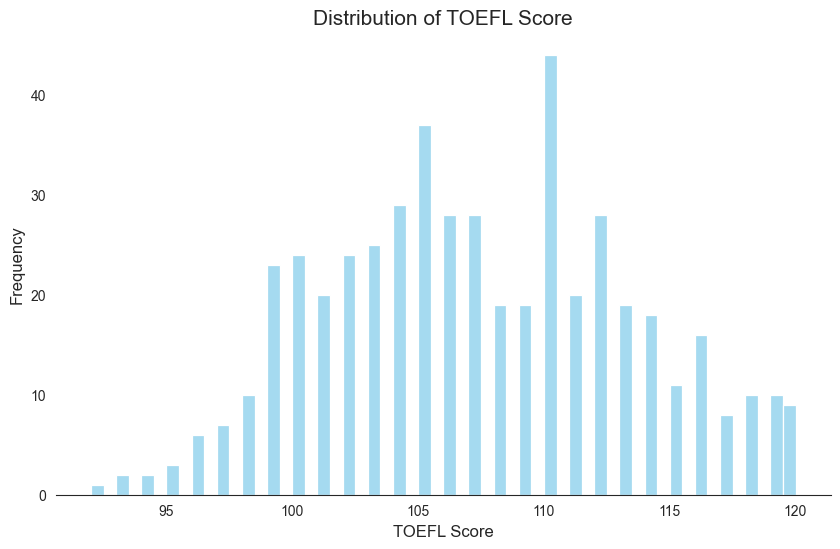

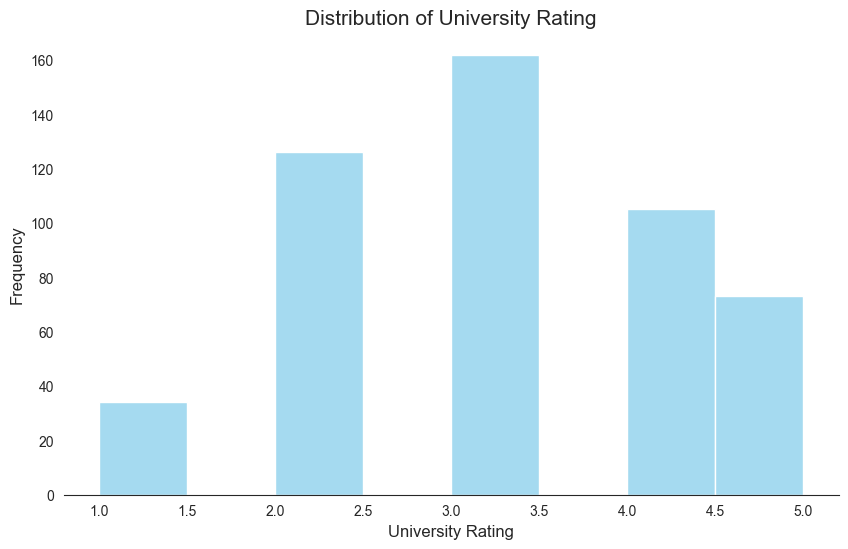

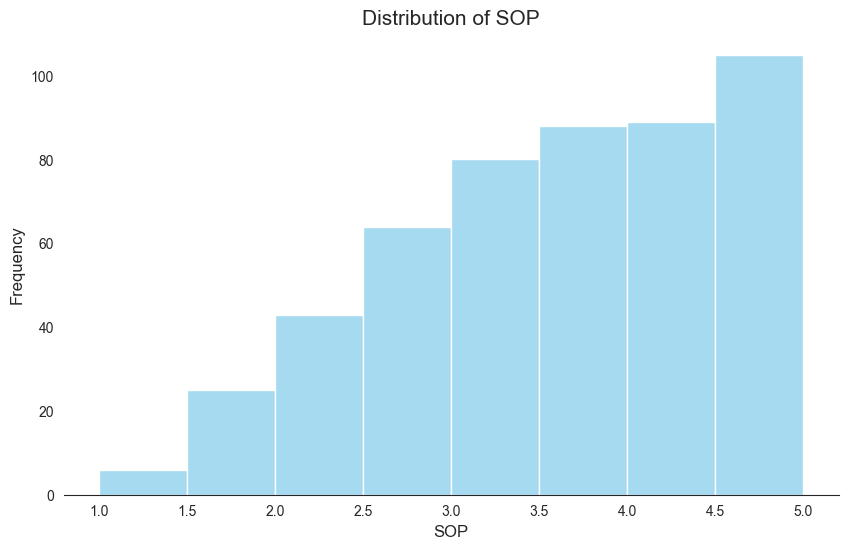

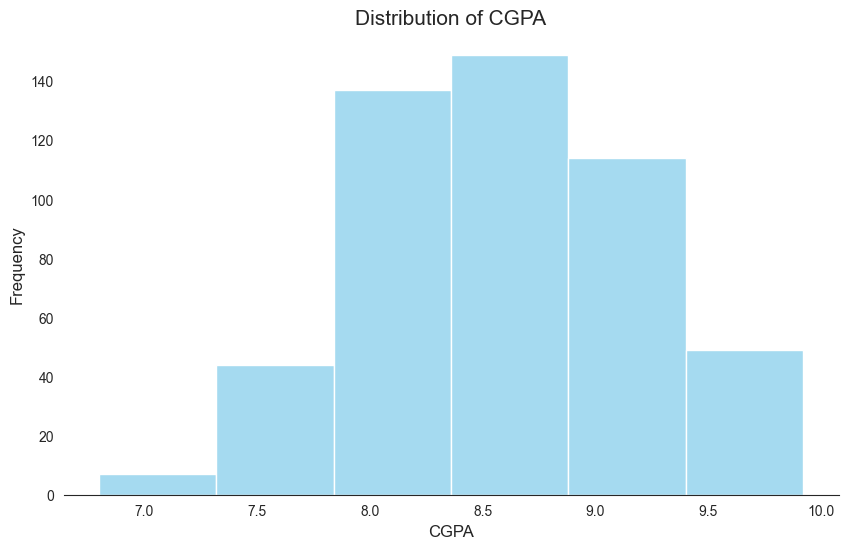

In [7]:
# List of features to plot
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA']

# Set a consistent color for all plots
color = "skyblue"

# Set a consistent style for all plots
sns.set_style("white")

# Loop through the features and create a histogram for each
for feature in features:
    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.histplot(df_admissions[feature], kde=False, color=color, binwidth=0.5)
    sns.despine(left=True)
    plt.title(f"Distribution of {feature}", fontsize=15)  # Set the title and its size
    plt.xlabel(feature, fontsize=12)  # Set the x-label and its size
    plt.ylabel("Frequency", fontsize=12)  # Set the y-label and its size
    plt.show()

From the visualization, there is a problem with the range of the data. The data is not in the same range, so we need to normalize the data in order to get a better visualization and to get a better result from the model.

### Cleaning the dataset

In [8]:
# Get the column names from the dataframe
column_names = df_admissions.columns

# Remove any leading or trailing spaces from the column names
column_names = column_names.str.strip()

# Convert the column names to lowercase to maintain consistency
column_names = column_names.str.lower()

# Replace any spaces within the column names with underscores for better readability
column_names = column_names.str.replace(' ', '_')

# Assign the cleaned column names back to the dataframe
df_admissions.columns = column_names

# Display the first few rows of the dataframe to verify the changes
df_admissions.head()

,serial_no.,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Exploratory Data Analysis (EDA)

**Exploratory Data Analysis (EDA)**: This is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. It includes cleaning, transforming, and visualizing data to understand the data better.

#### Univariate Analysis

##### GRE Score

The **GRE score**, also known as the **Graduate Record Examinations score**, is a metric used to assess an applicant's preparedness for graduate-level studies. 

GRE scores are **one factor considered by graduate schools during the admissions process**. They provide a benchmark for comparing applicants from diverse academic backgrounds and assessing their potential for success in rigorous graduate coursework.

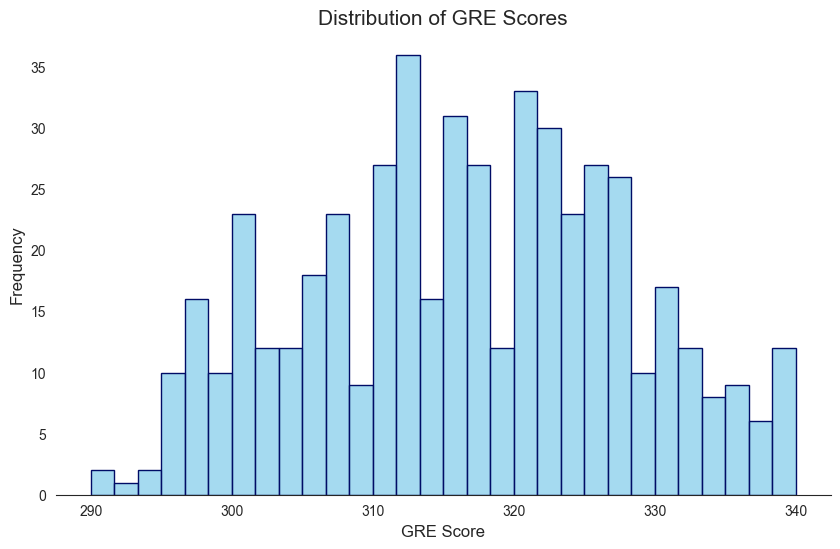

In [9]:
# Plot the distribution of GRE scores
utils.plot_distribution(
    data=df_admissions,
    column="gre_score",
    title="Distribution of GRE Scores",
    xlabel="GRE Score",
    ylabel="Frequency",
)

> The GRE score is more likely to be normally distributed, and the most of the data are in the range of 310 to 325.

**Feature Engineering for GRE Score**

For the analysis puproses, I will create feature creation for the GRE Score. The feature creation will be based on the GRE Score range. 

The **score range categorization** for GRE will be divided **into 4 categories**,  using **"Below Average," "Average," "Good," and "Excellent"** to help students shortlist universities:

| Category      | Score Range | Description |
| ------------- | ----------- | ----------- |
| Excellent     | 325+        | Top 25% of scores, highly competitive for top-tier universities. |
| Good          | 317 - 324   | Between 50% and 75% of scores, strong for many universities. |
| Average       | 308 - 316   | Between 25% and 50% of scores, may require a strong overall application for competitive programs. |
| Below Average | Below 308   | Bottom 25% of scores, may need improvement or targeting less competitive programs. |

In [10]:
# Get the summary statistics of the GRE scores
df_admissions["gre_score"].describe()

count    500.000000
mean     316.472000
std       11.295148
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: gre_score, dtype: float64

In [11]:
# Categorize the GRE scores into four categories
df_admissions['gre_score_category'] = df_admissions['gre_score'].apply(utils.categorize_score)

# Display the gre_score and gre_score_category columns 
counts_df = df_admissions.groupby('gre_score_category').size().reset_index(name='Counts')
counts_df = counts_df.sort_values('Counts', ascending=False)
counts_df

,gre_score_category,Counts
0,Average,132
2,Excellent,127
3,Good,125
1,Below Average,116


> Now lets see the distribution of the GRE Score based on the feature engineering.

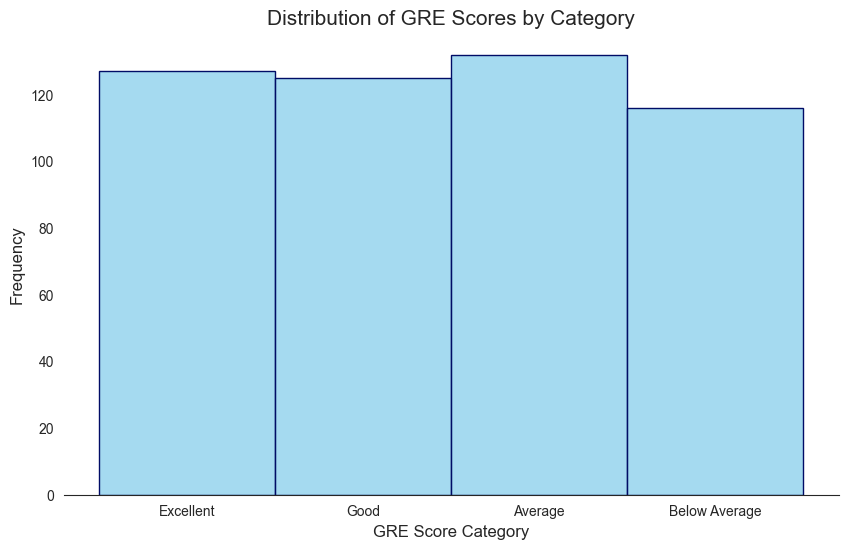

In [12]:
# Distribution of GRE scores by category
utils.plot_distribution(
    data=df_admissions,
    column="gre_score_category",
    title="Distribution of GRE Scores by Category",
    xlabel="GRE Score Category",
    ylabel="Frequency",
)

> As we can see, the distribution of the GRE Score based on the feature engineering is more clear and we can see the most of the data are in the "Average" category. 

##### TOEFL Score

The **TOEFL score**, also known as the **Test of English as a Foreign Language score**, is a metric used to assess an applicant's English language proficiency.

In [13]:
# Get the statistic summary of the TOEFL scores
df_admissions['toefl_score'].describe()

count    500.000000
mean     107.192000
std        6.081868
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: toefl_score, dtype: float64

> Based on the statistics, the TOEFL score is ranging from 92 until 120, That would be the TOEFL iBT (internet-based test).  The TOEFL iBT is the most common version of the TOEFL offered these days. It has a total score range of 0-120 with each of the four sections (Reading, Listening, Speaking, and Writing) contributing a maximum of 30 points

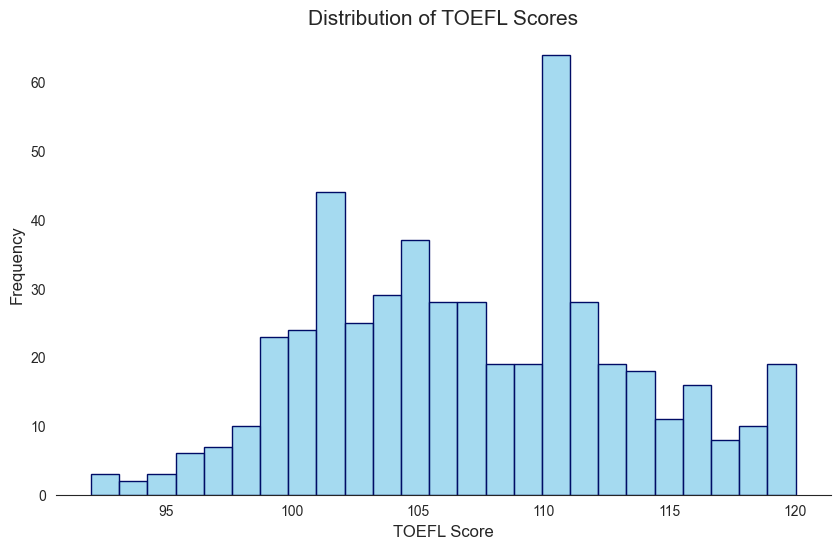

In [14]:
# Plot the distribution of GRE scores
utils.plot_distribution(
    data=df_admissions,
    column="toefl_score",
    title="Distribution of TOEFL Scores",
    xlabel="TOEFL Score",
    ylabel="Frequency",
    num_bins=25
)

> There are no outliers in the TOEFL Score data cause the data is in the range of the TOEFL iBT and the missing values are not present in the dataset.

##### University Rating

The **University Rating** is a metric used to assess the quality of the university where the applicant completed their undergraduate studies.

In [15]:
# Get the summary statistics of the University Rating
df_admissions['university_rating'].describe()

count    500.000000
mean       3.114000
std        1.143512
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: university_rating, dtype: float64

> It seems that the University Rating is ranging from 1 to 5, and the most of the data are in the range of 3 until 4.

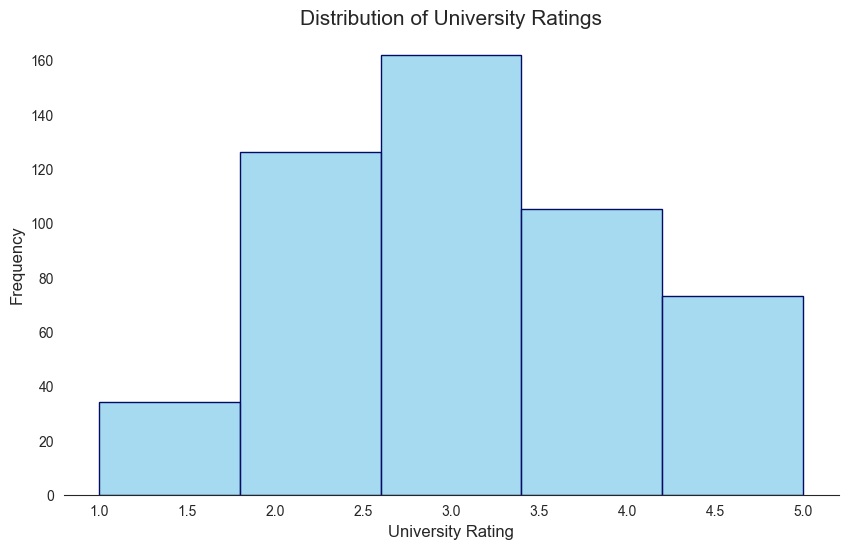

In [16]:
# Plot the distribution of University Ratings
utils.plot_distribution(
    data=df_admissions,
    column="university_rating",
    title="Distribution of University Ratings",
    xlabel="University Rating",
    ylabel="Frequency",
    num_bins=5
)

##### Statement of Purpose (SOP)

The **Statement of Purpose (SOP)** is a document submitted as part of the application process for graduate programs. It provides applicants with the opportunity to explain their motivations for pursuing a particular course of study and to demonstrate their writing skills.

By analyzing SOPs alongside other data, admissions committees can assess a student's suitability for the program beyond just grades and test scores.

In [17]:
# Get the summary statistics of the Statement of Purpose (SOP)
df_admissions['sop'].describe()

count    500.000000
mean       3.374000
std        0.991004
min        1.000000
25%        2.500000
50%        3.500000
75%        4.000000
max        5.000000
Name: sop, dtype: float64

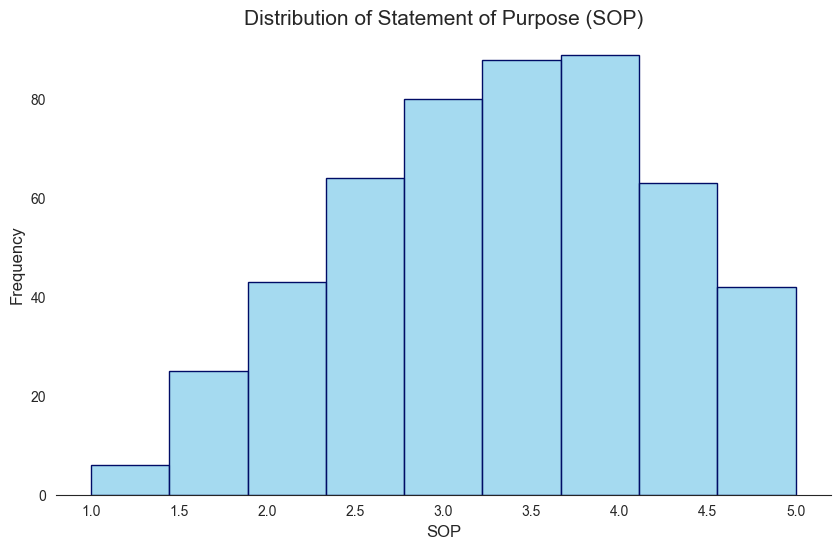

In [18]:
# Plot the distribution of Statement of Purpose (SOP)
utils.plot_distribution(
    data=df_admissions,
    column="sop",
    title="Distribution of Statement of Purpose (SOP)",
    xlabel="SOP",
    ylabel="Frequency",
    num_bins=9
)

> The sop data is ranging from 1 to 5, and the most of the data are in the range of 3 until 4. This means that the most of the students have a good SOP and there are no outliers in the data.

##### Letter of Recommendation (LOR)

The **Letter of Recommendation (LOR)** is a document submitted as part of the application process for graduate programs. It provides applicants with the opportunity to demonstrate their qualifications and potential for success in a particular course of study.

In [19]:
# Get the summary statistics of the LOR (Letter of Recommendation) Strength
df_admissions['lor'].describe()

count    500.00000
mean       3.48400
std        0.92545
min        1.00000
25%        3.00000
50%        3.50000
75%        4.00000
max        5.00000
Name: lor, dtype: float64

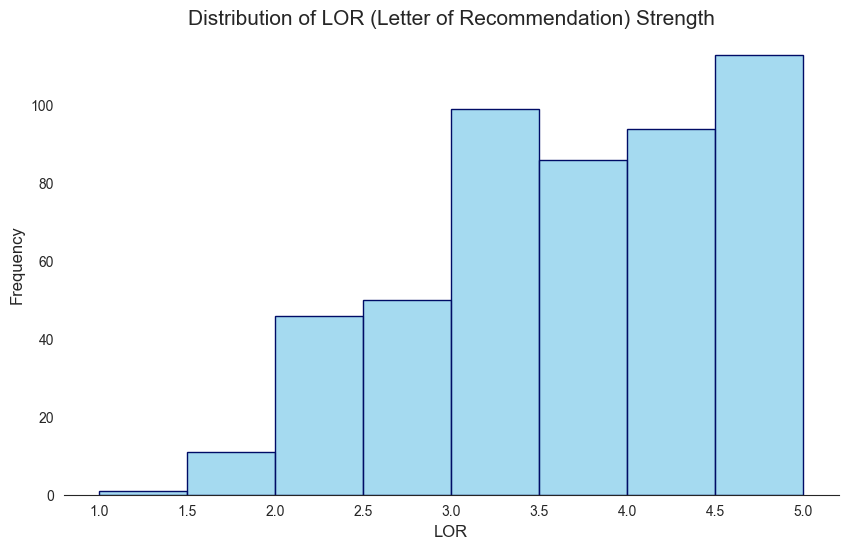

In [20]:
# Plot the distribution of LOR (Letter of Recommendation) Strength
utils.plot_distribution(
    data=df_admissions,
    column="lor",
    title="Distribution of LOR (Letter of Recommendation) Strength",
    xlabel="LOR",
    ylabel="Frequency",
    num_bins=8
)

> The LOR data is ranging from 1 to 5, and the most of the data are in the range of 4.5 until 5. This means that the most of the students have a good LOR and there are no outliers in the data.

##### Cumulative Grade Point Average (CGPA)

The **Cumulative Grade Point Average (CGPA)** is a metric used to assess an applicant's academic performance during their undergraduate studies.

In [21]:
# Get the summary statistics of the CGPA (Cumulative Grade Point Average)
df_admissions['cgpa'].describe()

count    500.000000
mean       8.576440
std        0.604813
min        6.800000
25%        8.127500
50%        8.560000
75%        9.040000
max        9.920000
Name: cgpa, dtype: float64

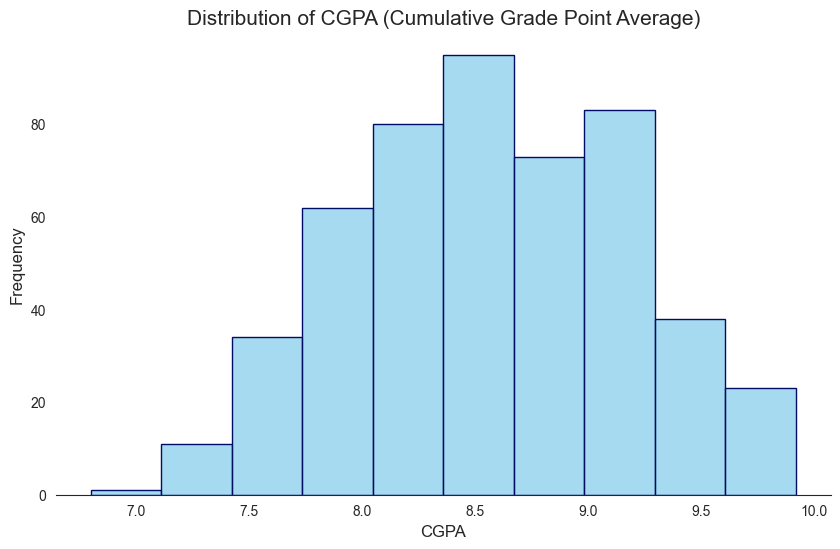

In [22]:
# Plot the distribution of CGPA (Cumulative Grade Point Average)
utils.plot_distribution(
    data=df_admissions,
    column="cgpa",
    title="Distribution of CGPA (Cumulative Grade Point Average)",
    xlabel="CGPA",
    ylabel="Frequency",
    num_bins=10
)

> The distribution of CGPA is rangin from 6 until 10, and the most of the data are in the range of 8 until 9.5. This means that the most of the students have a good CGPA and there are no outliers in the data.

##### Research

The **Research** column is a binary variable that indicates whether the applicant has research experience (1) or not (0).

In [23]:
# Get the summary statistics of the Research Experience
df_admissions['research'].describe()

count    500.000000
mean       0.560000
std        0.496884
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: research, dtype: float64

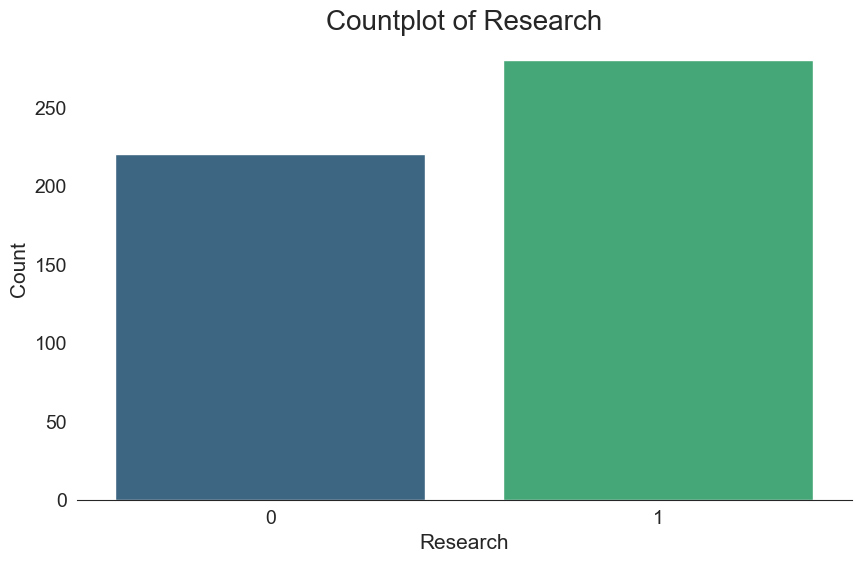

In [24]:
# Plot the distribution of Research Experience with count plot
utils.plot_binary_feature_count(df=df_admissions, feature="research")

> Based on the countplot above, we can conclude that the most of the students have a research experience.

### Bivariate Analysis

The **Bivariate Analysis** is the **analysis** of **two variables to determine the empirical relationship between them**. In this section, I want to see the relationship between the features and the target variable.

#### GRE Score vs Chance of Admit

d:\14. Codecademy\Deep Learning Regression with Admissions Data\utils.py:160: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y=target, hue=hue, data=df,


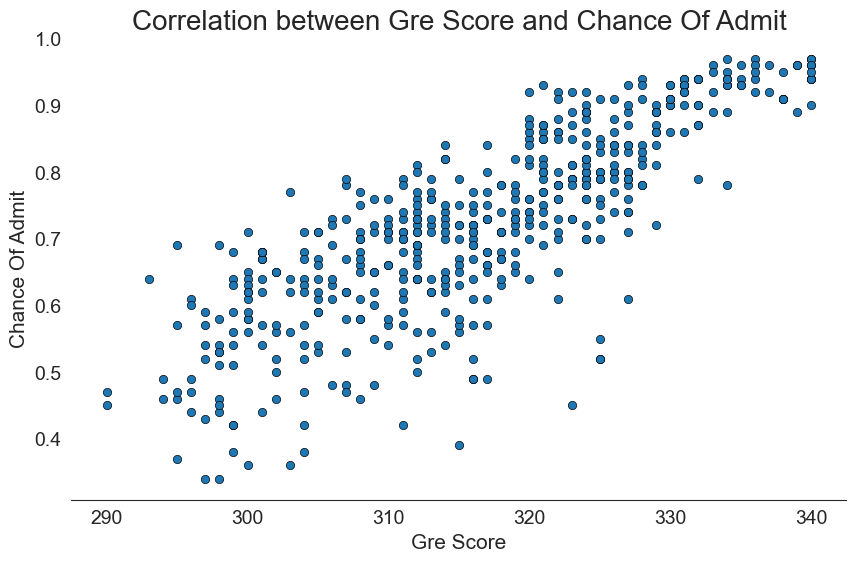

In [28]:
# Plot the scatter plot of GRE Score vs Chance of Admit
utils.plot_correlation(
    df=df_admissions,
    feature="gre_score",
    target="chance_of_admit"
)

#### TOEFL Score vs Chance of Admit

d:\14. Codecademy\Deep Learning Regression with Admissions Data\utils.py:160: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y=target, hue=hue, data=df,


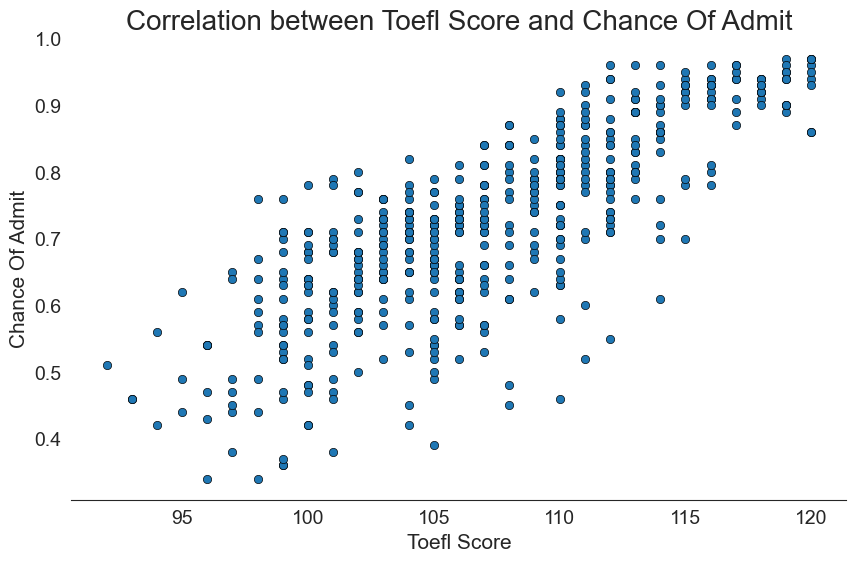

In [29]:
# Plot the scatter plot of TOEFL Score vs Chance of Admit
utils.plot_correlation(
    df=df_admissions,
    feature="toefl_score",
    target="chance_of_admit",
)

#### University Rating vs Chance of Admit

d:\14. Codecademy\Deep Learning Regression with Admissions Data\utils.py:160: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y=target, hue=hue, data=df,


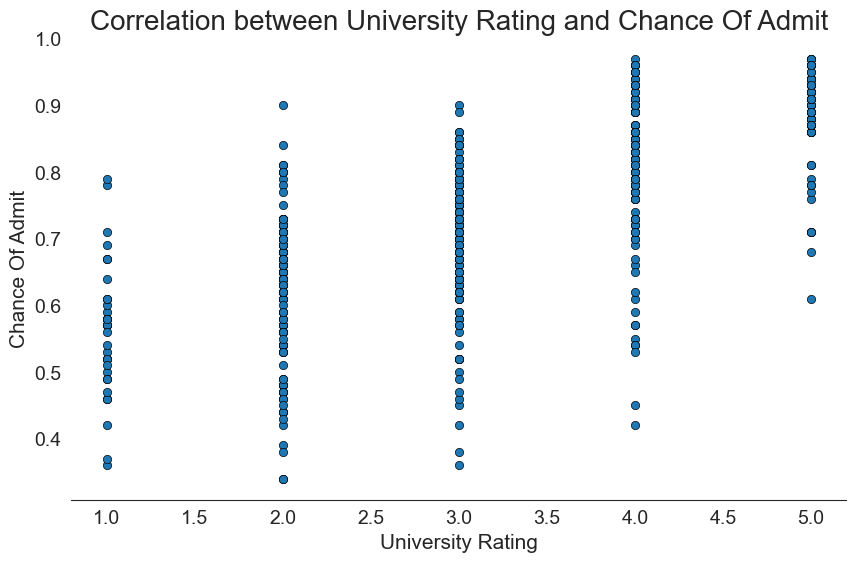

In [31]:
# Plot the scatter plot of University Rating vs Chance of Admit
utils.plot_correlation(
    df=df_admissions,
    feature="university_rating",
    target="chance_of_admit",
)

## Data Preprocessing

**Data Preprocessing**: This is the process of **converting raw data into a well-readable format**. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and may not be usable in its original form. **Steps in data preprocessing** might include **normalization, standardization, and encoding categorical variables**. This step is crucial as it can **affect the performance of the model**.